*Homework* 3
# **Homework 3** - Gas/coal switching

In this exercise you will calculate electricity cost from international commodity prices. Practically there are 3 main commodities: oil, gas and coal

Oil is given in \$/barrel. So you should find how much kWh in a barrel

Gas is given in \$/mmBtu. You should find mmbtu to kWh conversion

Coal is given in \$/ton. You should find calorific value for a kilogram of coal and then convert it to tonne.

Pick the XLSX file link for **monthly** pink sheet from [https://www.worldbank.org/en/research/commodity-markets](https://www.worldbank.org/en/research/commodity-markets)


1. Load standart libraries
2. Load the data
3. (convert all data cells to numbers : This is because of worldbank data has ".." for some cells and confuses Python dataframes
4. Create new columns as C35 (Coal plant 35% efficient), N52 (natural gas 52%), O40(crude oil 40%)
    > For naming  C35_RESOURCE like *O40_BRENT* or *N52_US* (Ngas_us)
5. Analyze




In [ ]:
# 1. load standard libraries
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# 2 Load the data
wb_pinksheet="http://pubdocs.worldbank.org/en/561011486076393416/CMO-Historical-Data-Monthly.xlsx"
prices=pd.read_excel(wb_pinksheet,sheet_name="Monthly Prices", skiprows=6)

In [ ]:
#  ------------ This step is not relevant to you, for cleaning data -----------------------------------
prices=prices[-120:]
priceset=prices[["CRUDE_PETRO","CRUDE_BRENT","CRUDE_DUBAI","CRUDE_WTI","COAL_AUS","COAL_SAFRICA","NGAS_US","NGAS_EUR","NGAS_JP"]]                

In [ ]:
priceset=priceset.applymap(float); # convert to float all numbers
# ----------------------------------------------------------------------------------------------------

In [ ]:
# see the first two rows of the dataselected
# head command ->  head(#number of rows)
priceset.tail(2)

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP
727,43.443333,44.26,43.71,42.36,50.14,57.38,2.2933,2.861897,6.343032
728,40.596667,41.09,41.10,39.60,54.60,57.47,1.9186,3.952139,6.343032


In [ ]:
# make sure all columns are float or number otherwise correlation will not perform use .dtypes extension to check it
priceset.dtypes

CRUDE_PETRO     float64
CRUDE_BRENT     float64
CRUDE_DUBAI     float64
CRUDE_WTI       float64
COAL_AUS        float64
COAL_SAFRICA    float64
NGAS_US         float64
NGAS_EUR        float64
NGAS_JP         float64
dtype: object

In [ ]:
# Now the questions
# Q1 - kWh equivalent of energy content of a ton of coal?   coal2kwh
# Q2 - kWh equivalent of mmbtu of gas? mmbtu2kwh
# Q3 - kWh equivalent of energy content of a barrel of oil? barrel2kwh
coal2kwh=1
mmbtu2kwh=1
barrel2kwh=1

#now the efficiencies   ------dont change this---------------
effcoal=0.35
effgas=0.52
effoil=0.4
#-------------------------------------------------------------


In [ ]:
# electricity produced from coal, oil, gas
kwhfromcoal= coal2kwh*effcoal
kwhfromgas=mmbtu2kwh*effgas
kwhfromoil=barrel2kwh*effoil

In [ ]:
priceset.columns

Index(['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'COAL_AUS',
       'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'O40_PETRO',
       'O40_BRENT', 'O40_DUBAI', 'O40_WTI', 'C35_AUS', 'C35_SAFRICA', 'N52_US',
       'N52_EUR', 'N52_JP'],
      dtype='object')

In [ ]:
#now let's create electricity costs from these resources
#since prices are cent/kWh we will convert $ to cent by multiplying by 100

# electricity cost from oil
priceset["O40_PETRO"]= priceset['CRUDE_PETRO']*100/kwhfromoil
priceset["O40_BRENT"]= priceset['CRUDE_BRENT']*100/kwhfromoil
priceset["O40_DUBAI"]= priceset['CRUDE_DUBAI']*100/kwhfromoil
priceset["O40_WTI"]= priceset['CRUDE_WTI']*100/kwhfromoil

# electricity cost from coal
priceset["C35_AUS"]= priceset['COAL_AUS']*100/kwhfromcoal
priceset["C35_SAFRICA"]= priceset['COAL_SAFRICA']*100/kwhfromcoal


#electricity cost from natural gas
priceset["N52_US"]= priceset['NGAS_US']*100/kwhfromgas
priceset["N52_EUR"]= priceset['NGAS_EUR']*100/kwhfromgas
priceset["N52_JP"]= priceset['NGAS_JP']*100/kwhfromgas

In [ ]:
priceset.tail(2)

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,O40_PETRO,O40_BRENT,O40_DUBAI,O40_WTI,C35_AUS,C35_SAFRICA,N52_US,N52_EUR,N52_JP
727,43.443333,44.26,43.71,42.36,50.14,57.38,2.2933,2.861897,6.343032,6.671274,6.796683,6.712224,6.504914,2.052983,2.349425,1.505185,1.878378,4.163187
728,40.596667,41.09,41.10,39.60,54.60,57.47,1.9186,3.952139,6.343032,6.234132,6.309889,6.311425,6.081081,2.235598,2.353110,1.259254,2.593948,4.163187


Text(0, 0.5, 'cent/kWh')

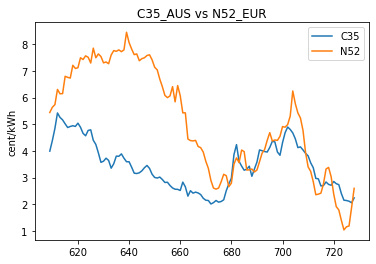

In [ ]:
# now plot various graphs
plot(priceset.C35_AUS,label="C35")
plot(priceset.N52_EUR,label="N52")
legend(loc="upper right")
title("C35_AUS vs N52_EUR")
ylabel("cent/kWh")

Text(0, 0.5, 'cent/kWh')

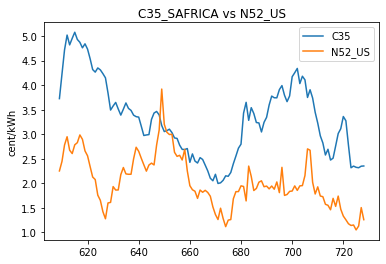

In [ ]:
plot(priceset.C35_SAFRICA,label="C35")
plot(priceset.N52_US,label="N52_US")
legend(loc="upper right")
title("C35_SAFRICA vs N52_US")
ylabel("cent/kWh")

In [ ]:
# You can also calculate margins
priceset.C35_SAFRICA-priceset.N52_US

609    1.473355
610    1.779181
611    1.937527
612    2.071478
613    2.146345
         ...   
724    1.200826
725    1.275614
726    1.186810
727    0.844240
728    1.093855
Length: 120, dtype: float64